# Exploratory Data Analysis of Spectrum Data "raw_data_utf8.csv"

**0. Доменная область анализируемых данных:**

Данный датасет содержит данные о спектральной характеристике поляризационного светофильтра. Исследовалась зависимость коэффициента отражения/пропускания (интенсивности отраженного излучения) в зависимости от угла поворота.

Для дальнейшего анализа данных, необходимо иметь представление о виде спектральных зависимостей, представленных на рисунке ниже:
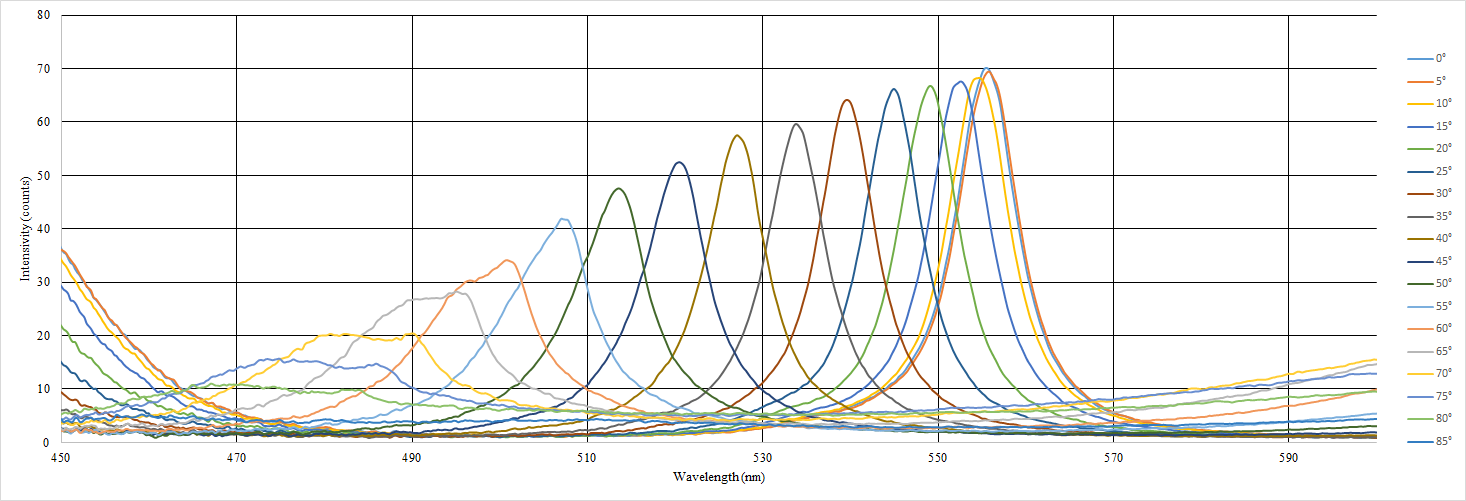

**1. Импортируем необходимые для анализа библиотеки:**

In [43]:
import pandas as pd # для анализа данных
import matplotlib.pyplot as plt # для построения графиков
import pandera.pandas as pa # для валидации данных
from pandera import Column, DataFrameSchema, Check
import seaborn as sns
from matplotlib.ticker import MultipleLocator
pd.set_option('display.max_columns', None) # настройка отображения максимального количества колонок
pd.set_option('display.max_rows', 200) # настройка отображения максимального количества строк

**2. Импортируем датасет из google drive:** декодирование - `utf-8`, разделители - `;`, первые 17 строк содержат метаданные о типе спектрометра, дате, времени, количестве измерений и т. д.

In [3]:
FILE_ID = "1sStrkLT-LQ3sIPJD-rPY0LNCCk5l1lbg"  # ID файла на google drive
file_url = f"https://drive.google.com/uc?id={FILE_ID}" # сформированный URl через f-строку

try:
    df = pd.read_csv(
        file_url, on_bad_lines="skip", skiprows=17, encoding="utf-8", delimiter=";"
    )

    print("Датасет успешно загружен.")
    print(f"Загружено {df.shape[0]} строк, {df.shape[1]} столбцов.") # выводим размер датафрейма
    primary_ncols = df.shape[0] # количество строк до обработки
    if df.shape[0] > 0: # проверка на наличие данных
        df = df.dropna()  # Delete all-NaN rows

        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

        print("\nПервые 10 строк датасета:")
        display(df.head(10))
        print("Последние 10 строк датасета:")
        display(df.tail(10))
        print("Типы данных колонок:")
        print(df.dtypes)
        secondary_ncols = df.shape[0]
    else:
        print("Нет данных или неверный формат.")

except Exception as e:
    print(f"Error: {e}")
print(f"Размер датафрейма после обработки: {df.shape}") # выводим размер датафрейма
print(f'Утеряно данных: {round(((primary_ncols-secondary_ncols)/primary_ncols*100),3)}%.')

Датасет успешно загружен.
Загружено 2967 строк, 19 столбцов.

Первые 10 строк датасета:


,"lambda, nm",intensivity (0 deg),intensivity (5 deg),intensivity (10 deg),intensivity (15 deg),intensivity (20 deg),intensivity (25 deg),intensivity (30 deg),intensivity (35 deg),intensivity (40 deg),intensivity (45 deg),intensivity (50 deg),intensivity (55 deg),intensivity (60 deg),intensivity (65 deg),intensivity (70 deg),intensivity (75 deg),intensivity (80 deg),intensivity (85 deg)
0,350.257,50.515,61.856,25.773,38.144,5.155,40.206,29.897,44.330,41.237,1.031,26.804,39.175,50.515,39.175,27.835,25.773,18.557,9.278
1,350.522,31.884,21.739,2.899,28.986,15.942,24.638,8.696,27.536,5.797,0.000,10.145,5.797,31.884,10.145,28.986,1.449,0.000,0.000
2,350.787,25.301,24.096,25.301,30.120,50.602,25.301,9.639,40.964,15.663,49.398,28.916,22.892,46.988,19.277,30.120,14.458,8.434,22.892
3,351.053,28.182,21.818,30.000,20.909,30.909,25.455,11.818,30.909,21.818,28.182,24.545,21.818,26.364,43.636,26.364,10.909,15.455,21.818
4,351.318,13.000,13.000,26.000,21.000,12.000,9.000,16.000,21.000,18.000,25.000,8.000,7.000,7.000,40.000,22.000,6.000,13.000,7.000
5,351.584,0.000,0.000,30.000,13.333,0.000,0.000,0.000,0.000,1.667,15.000,0.000,0.000,0.000,3.333,0.000,0.000,0.000,0.000
6,351.849,0.000,0.000,33.333,33.333,0.000,0.000,5.882,0.000,0.000,13.725,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,352.114,0.000,14.667,30.667,9.333,10.667,6.667,20.000,14.667,17.333,36.000,28.000,8.000,22.667,0.000,16.000,5.333,0.000,0.000
8,352.380,35.897,44.872,47.436,2.564,24.359,19.231,29.487,30.769,35.897,14.103,23.077,3.846,34.615,6.410,26.923,25.641,21.795,11.538
9,352.645,50.562,74.157,24.719,11.236,2.247,20.225,6.742,42.697,19.101,16.854,28.090,20.225,13.483,23.596,34.831,11.236,34.831,8.989


Последние 10 строк датасета:


,"lambda, nm",intensivity (0 deg),intensivity (5 deg),intensivity (10 deg),intensivity (15 deg),intensivity (20 deg),intensivity (25 deg),intensivity (30 deg),intensivity (35 deg),intensivity (40 deg),intensivity (45 deg),intensivity (50 deg),intensivity (55 deg),intensivity (60 deg),intensivity (65 deg),intensivity (70 deg),intensivity (75 deg),intensivity (80 deg),intensivity (85 deg)
2956,1097.747,33.784,45.946,1.351,33.784,50.000,24.324,40.541,52.703,21.622,0.000,20.270,14.865,10.811,0.000,20.270,0.000,13.514,0.000
2957,1097.987,28.846,32.692,30.769,44.231,57.692,63.462,9.615,76.923,19.231,34.615,0.000,61.538,67.308,0.000,42.308,0.000,5.769,11.538
2958,1098.226,0.000,0.000,0.000,36.842,57.895,26.316,0.000,5.263,0.000,0.000,0.000,100.000,100.000,0.000,0.000,0.000,0.000,0.000
2959,1098.466,68.966,79.310,93.103,100.000,100.000,100.000,48.276,100.000,72.414,86.207,72.414,100.000,100.000,100.000,96.552,82.759,20.690,58.621
2960,1098.706,100.000,100.000,100.000,100.000,100.000,100.000,69.231,100.000,100.000,69.231,38.462,100.000,100.000,100.000,100.000,100.000,84.615,80.769
2961,1098.945,100.000,42.857,66.667,28.571,28.571,9.524,21.429,90.476,47.619,47.619,26.190,66.667,80.952,57.143,30.952,35.714,80.952,4.762
2962,1099.185,87.234,21.277,44.681,42.553,57.447,6.383,8.511,100.000,27.660,72.340,87.234,65.957,53.191,53.191,89.362,19.149,76.596,12.766
2963,1099.425,0.000,52.381,100.000,100.000,80.952,14.286,0.000,100.000,66.667,71.429,100.000,61.905,85.714,0.000,100.000,0.000,61.905,0.000
2964,1099.664,30.000,55.000,100.000,40.000,100.000,65.000,35.000,100.000,100.000,100.000,100.000,100.000,100.000,0.000,60.000,10.000,10.000,5.000
2965,1099.904,100.000,62.791,97.674,20.930,74.419,34.884,0.000,58.140,67.442,46.512,100.000,88.372,53.488,0.000,6.977,27.907,34.884,27.907


Типы данных колонок:
lambda, nm              float64
intensivity (0 deg)     float64
intensivity (5 deg)     float64
intensivity (10 deg)    float64
intensivity (15 deg)    float64
intensivity (20 deg)    float64
intensivity (25 deg)    float64
intensivity (30 deg)    float64
intensivity (35 deg)    float64
intensivity (40 deg)    float64
intensivity (45 deg)    float64
intensivity (50 deg)    float64
intensivity (55 deg)    float64
intensivity (60 deg)    float64
intensivity (65 deg)    float64
intensivity (70 deg)    float64
intensivity (75 deg)    float64
intensivity (80 deg)    float64
intensivity (85 deg)    float64
dtype: object
Размер датафрейма после обработки: (2966, 19)
Утеряно данных: 0.034%.


Размерности данных до и после обработки различаются на одну строку - возможно спектрометр при сохранении данных оставил последнюю строку пустой и она была удалена при помощи метода dropna(). Решение удалять строки, содержащие пустые значения было принято вследствие малого количества таких строк (<< 1%) относительно размера выборки.

**3. Проверка приведения типов, базовые статистические величины по столбцам:**

In [4]:
display(df.info()) # общая информация о данных
display(df.describe(include='all').T) # выводим описание датафрейма (статистику по столбцам) и транспонируем результат

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 0 to 2965
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lambda, nm            2966 non-null   float64
 1   intensivity (0 deg)   2966 non-null   float64
 2   intensivity (5 deg)   2966 non-null   float64
 3   intensivity (10 deg)  2966 non-null   float64
 4   intensivity (15 deg)  2966 non-null   float64
 5   intensivity (20 deg)  2966 non-null   float64
 6   intensivity (25 deg)  2966 non-null   float64
 7   intensivity (30 deg)  2966 non-null   float64
 8   intensivity (35 deg)  2966 non-null   float64
 9   intensivity (40 deg)  2966 non-null   float64
 10  intensivity (45 deg)  2966 non-null   float64
 11  intensivity (50 deg)  2966 non-null   float64
 12  intensivity (55 deg)  2966 non-null   float64
 13  intensivity (60 deg)  2966 non-null   float64
 14  intensivity (65 deg)  2966 non-null   float64
 15  intensivity (70 deg)  2966

None

,count,mean,std,min,25%,50%,75%,max
"lambda, nm",2966.0,731.447032,216.585526,350.257,544.74775,734.6335,919.74250,1099.904
intensivity (0 deg),2966.0,39.276668,28.757159,0.000,5.12100,45.1925,61.20550,100.000
intensivity (5 deg),2966.0,39.501276,29.029458,0.000,5.13650,45.6755,61.64200,100.000
intensivity (10 deg),2966.0,39.311765,28.643079,0.000,5.19925,45.9185,61.48500,100.000
intensivity (15 deg),2966.0,39.440600,28.598342,0.000,5.34675,45.6545,61.08700,100.000
intensivity (20 deg),2966.0,39.469080,28.687700,0.000,5.35275,45.3960,60.66950,100.000
intensivity (25 deg),2966.0,39.363013,28.459657,0.000,5.83650,44.7770,59.90200,100.000
intensivity (30 deg),2966.0,39.242370,28.378185,0.000,5.78825,44.1665,59.64500,100.000
intensivity (35 deg),2966.0,38.986400,27.673552,0.000,6.60325,43.2515,58.87575,100.000
intensivity (40 deg),2966.0,38.657842,27.644696,0.000,7.76775,41.7980,57.41525,100.000


count - количество отсчётов; mean - среднее значение; std - стандартное отклонение; min - минимальное значение; 25%, 50%, 75% - перцентили, max - максимальное значение.
Анализируя полученные данные, можно сказать, что среднее значение интенсивности спектра уменьшается с ростом угла поворота фильтра, что в "аналоговом" мире ощущается как затемнение. 

**4. Проверка приведения типов, расчёт базовых статистических величин по столбцам:**

,"lambda, nm",intensivity (0 deg),intensivity (5 deg),intensivity (10 deg),intensivity (15 deg),intensivity (20 deg),intensivity (25 deg),intensivity (30 deg),intensivity (35 deg),intensivity (40 deg),intensivity (45 deg),intensivity (50 deg),intensivity (55 deg),intensivity (60 deg),intensivity (65 deg),intensivity (70 deg),intensivity (75 deg),intensivity (80 deg),intensivity (85 deg)
Completeness,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


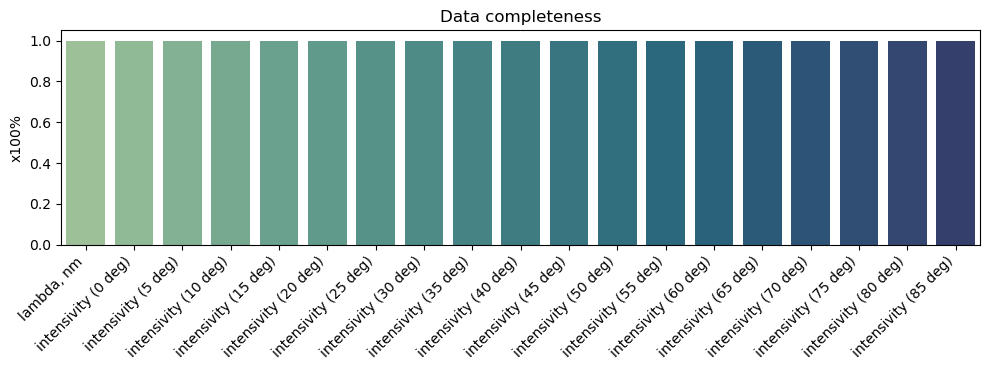

In [12]:
completeness = df.notnull().mean() # полнота данных (доля непустых значений)
# метод notnull() возвращает 1 (True), если значение не равно NaN/Null, иначе 0 (False)
# метод mean() вычисляет среднее по столбцу, а т.к. он состоит из 0 и 1, то возвращенное значение равно доле непустых значений
display(completeness.to_frame(name='Completeness').T) # преобразовываем pandas.series в pandas.dataframe

plt.figure(figsize=(10, 4)) # график полноты данных по столбцам
# строим гистограмму, указав оси и цветовую палитру
sns.barplot(x=completeness.index,
            y=completeness.values,
            hue=completeness.index, # автоматическая цветовая группировка
            palette="crest"
)
plt.title("Data completeness") # название
plt.ylabel("x100%")
plt.xlabel(" ")
plt.xticks(rotation=45, ha="right") # поворот осей подписей Х, чтобы они не налезали друг на друга
plt.tight_layout() #график вписывается в окно вывода
plt.show() # вывод

Так как данные были предварительно обработаны, а пустые строки - удалены, то полученная картина о полноте данных вполне ожидаема.
Без предварительной обработки, полнота данных составляла бы примерно 1 - 0.034/100 = 0.99966, что тоже является отличным показателем.

**5. Проверка на наличие дубликатов:**

In [110]:
dups = df.duplicated().sum() # проверка дубликатов
# метод duplicated() возвращает pandas.series с bool-значениями, метод sum() суммирует количество дубликатов (True)
print(f'Количество полных дубликатов: {dups}.')

Количество полных дубликатов: 0.


Нулевое количество дубликатов при таком объёме выборки позволяет судить о точности измерений - чем точнее измеряется величина, тем меньше шанс, что величины совпадут.

**6. Анализ числовых столбцов и поиск выбросов методом IQR:**

Метод IQR был выбран, так как графики спектров имеют вид схожий с нормальным распределением, но:
1) графики не нормированы к максимальному значению интенсивности;
2) координаты длин волн максимумов интенсивности различаются для каждого столбца (поворот светофильтра приводит к смещению пика интенсивности в фиолетовую область).

То есть, графики условно имеют схожий с нормальным распределением вид, но каждый следующий находится ниже и левее предыдущего.

In [111]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist() # выбираем number-столбцы и приводим их к списку
for name in numeric_cols:
    print(name)

outlier_summary = [] # список суммарных выбросов
for col in numeric_cols: # цикл по числовым столбцам
    ser = df[col]
    q1 = ser.quantile(0.25) # 25% значений ниже этого значения
    q3 = ser.quantile(0.75) # 75% значений ниже этого значения
    iqr = q3 - q1 # межквартильный размах, диапазон, содержащий половину данных
    lower = q1 - 1.5 * iqr # нижняя граница выбросов
    upper = q3 + 1.5 * iqr # верхняя граница выбросов
    outliers = ser[(ser < lower) | (ser > upper)]
    # ser < lower создает список булевых значений для неравенства
    # если число удовлетворяет хотя бы одному из условий, оно попадает в outliers
    pct = 100 * len(outliers) / len(ser) # рассчитываем процент выбросов
    '''
    процент выбросов рассчитывается исходя из отношения количества выбросов к количеству строк
    '''
    outlier_summary.append((col, len(outliers), round(pct,3), float(ser.min()), float(ser.max())))
    # добавляем к итоговому списку название текущей колонки, количество выбросов и округленные значения

out_df = pd.DataFrame(outlier_summary, columns=['column','outlier_count','outlier_pct','min','max']).sort_values('outlier_pct', ascending=False)
# создаем из полученных данных датафрейм, отсортированный по столбцу процентов выбросов
display(out_df)


lambda, nm
intensivity (0 deg)
intensivity (5 deg)
intensivity (10 deg)
intensivity (15 deg)
intensivity (20 deg)
intensivity (25 deg)
intensivity (30 deg)
intensivity (35 deg)
intensivity (40 deg)
intensivity (45 deg)
intensivity (50 deg)
intensivity (55 deg)
intensivity (60 deg)
intensivity (65 deg)
intensivity (70 deg)
intensivity (75 deg)
intensivity (80 deg)
intensivity (85 deg)


,column,outlier_count,outlier_pct,min,max
18,intensivity (85 deg),281,9.474,0.000,100.000
17,intensivity (80 deg),157,5.293,0.000,100.000
16,intensivity (75 deg),106,3.574,0.000,100.000
15,intensivity (70 deg),70,2.360,0.000,100.000
14,intensivity (65 deg),55,1.854,0.000,100.000
13,intensivity (60 deg),51,1.719,0.000,100.000
10,intensivity (45 deg),0,0.000,0.000,100.000
12,intensivity (55 deg),0,0.000,0.000,100.000
11,intensivity (50 deg),0,0.000,0.000,100.000
0,"lambda, nm",0,0.000,350.257,1099.904


Из столбца с процентом выбросов (`outlier_pct`) видно, что, начиная с угла поворота 60 градусов, количество выбросов становится ненулевым - и растёт нелинейно. Это может быть связано с разными факторами, например, учитывая смещение пиков интенсивности, отмеченное выше, и чёткое разделение на "до" и "после", можно предположить, что неидеальность спектральной чувствительности детектора хоть и скомпенсирована программно, но не исключает возможности более шумных данных в этой области. 

**7. Построение матрицы корреляции и heat-map:**

Честно говоря, построил чисто из интереса, не представляю что в моем случае с этим делать :)

,"lambda, nm",intensivity (0 deg),intensivity (5 deg),intensivity (10 deg),intensivity (15 deg),intensivity (20 deg),intensivity (25 deg),intensivity (30 deg),intensivity (35 deg),intensivity (40 deg),intensivity (45 deg),intensivity (50 deg),intensivity (55 deg),intensivity (60 deg),intensivity (65 deg),intensivity (70 deg),intensivity (75 deg),intensivity (80 deg),intensivity (85 deg)
"lambda, nm",1.000,0.562,0.578,0.587,0.602,0.631,0.645,0.685,0.723,0.756,0.787,0.794,0.820,0.807,0.794,0.736,0.665,0.539,0.402
intensivity (0 deg),0.562,1.000,0.944,0.943,0.944,0.906,0.872,0.831,0.778,0.730,0.675,0.614,0.558,0.498,0.471,0.408,0.376,0.351,0.329
intensivity (5 deg),0.578,0.944,1.000,0.948,0.933,0.903,0.882,0.831,0.771,0.738,0.681,0.614,0.580,0.493,0.472,0.431,0.415,0.373,0.329
intensivity (10 deg),0.587,0.943,0.948,1.000,0.950,0.923,0.880,0.840,0.790,0.741,0.691,0.617,0.577,0.514,0.489,0.436,0.415,0.363,0.324
intensivity (15 deg),0.602,0.944,0.933,0.950,1.000,0.942,0.906,0.871,0.811,0.761,0.710,0.643,0.597,0.545,0.513,0.426,0.404,0.342,0.317
intensivity (20 deg),0.631,0.906,0.903,0.923,0.942,1.000,0.926,0.891,0.846,0.800,0.731,0.674,0.625,0.564,0.531,0.457,0.420,0.355,0.303
intensivity (25 deg),0.645,0.872,0.882,0.880,0.906,0.926,1.000,0.924,0.868,0.831,0.772,0.710,0.673,0.601,0.567,0.488,0.463,0.374,0.327
intensivity (30 deg),0.685,0.831,0.831,0.840,0.871,0.891,0.924,1.000,0.917,0.884,0.827,0.760,0.713,0.652,0.617,0.528,0.501,0.391,0.338
intensivity (35 deg),0.723,0.778,0.771,0.790,0.811,0.846,0.868,0.917,1.000,0.908,0.854,0.809,0.748,0.704,0.661,0.567,0.520,0.433,0.339
intensivity (40 deg),0.756,0.730,0.738,0.741,0.761,0.800,0.831,0.884,0.908,1.000,0.932,0.868,0.835,0.764,0.729,0.645,0.566,0.476,0.382


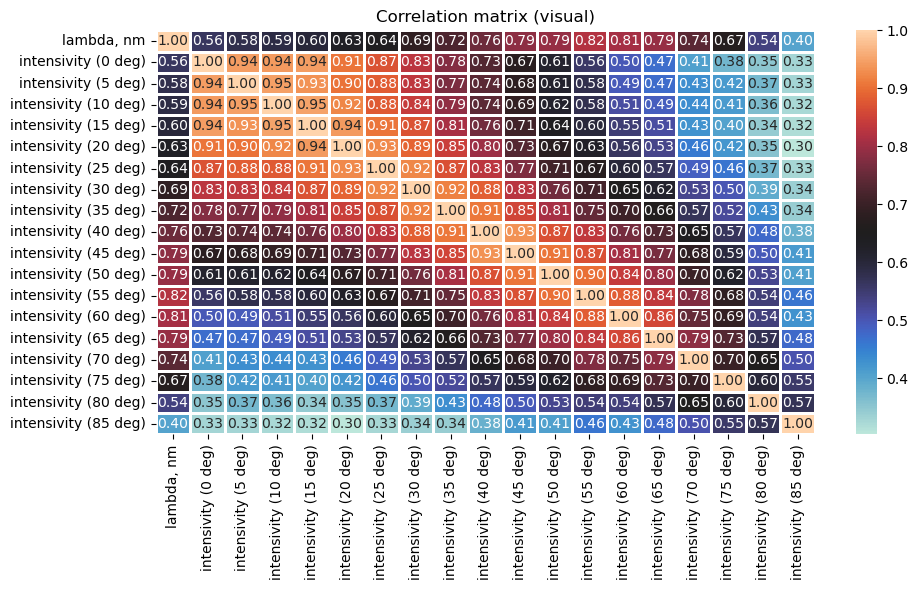

In [23]:
# Корреляция между числовыми столбцами (heatmap)
corr = df.select_dtypes(include=['number']).corr() # вычисляем матрицу корреляции 
display(corr.round(3))

# Визуализация корреляционной матрицы (heat-map)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="icefire", fmt=".2f", linewidths=1)
'''
annot = True - выводит числовые значения в ячейках матрицы
cmap="icefire" - используем для визуализации красно-синие цвета, градиент которых учитывает особенности цветовосприятия глаза
fmt=".2f" - форматирование числовых значений в ячейках к float с 2 знаками после точки
linewidths=1 - задает расстояние между ячейками
'''
plt.title("Correlation matrix (visual)")
plt.tight_layout()
plt.show()


**8. Уникальность данных:**

In [113]:
# сводная таблица метрик качества данных
metrics = pd.DataFrame({
    'Тип данных': df.dtypes.astype(str)
})

metrics['Уникальных'] = df.nunique(dropna=False) # кол-во уникальных значений для каждого столбца
metrics['Процент уникальных'] = round(metrics['Уникальных'] / secondary_ncols * 100, 3)
display(metrics.sort_values('Процент уникальных', ascending=False))

,Тип данных,Уникальных,Процент уникальных
"lambda, nm",float64,2966,100.000
intensivity (60 deg),float64,2746,92.583
intensivity (55 deg),float64,2743,92.481
intensivity (50 deg),float64,2742,92.448
intensivity (65 deg),float64,2736,92.245
intensivity (70 deg),float64,2733,92.144
intensivity (45 deg),float64,2697,90.931
intensivity (40 deg),float64,2690,90.695
intensivity (10 deg),float64,2686,90.560
intensivity (35 deg),float64,2682,90.425


В данном случае, уникальность данных не имеет значения, спектральная кривая в каждом случае может повторять свои значения, так как имеет вид схожий с нормальным распределением - для множества выборок не будет корреляции между углом поворота и процентом уникальности данных, это абсолютно случайная величина. Ряд данных `lambda, nm` имеет стопроцентную уникальность, что вполне очевидно - это единственный монотонно возрастающий ряд (столбец) данных.

**0.1. Построение спектров с помощью Seaborn:**

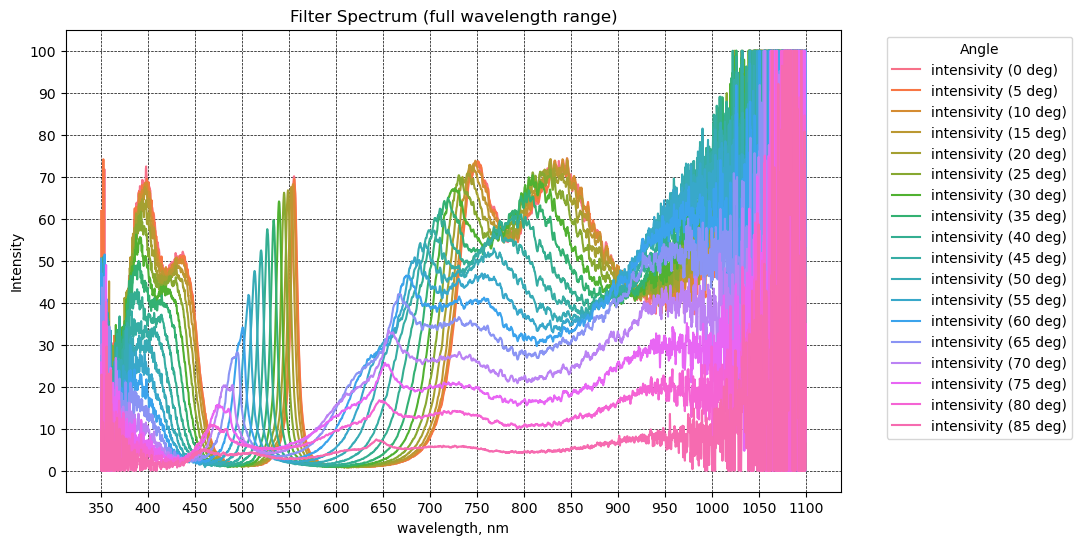

In [50]:
# форматируем данные для визуализации
df_long = df.melt(id_vars=["lambda, nm"], 
                  var_name="Angle", 
                  value_name="Intensity")
'''
id_vars=["lambda, nm"] - столбец-идентификатор, ось Х
var_name="Angle" - имя столбца, содержащего названия intensivity (XX deg)
value_name="Intensity" - имя столбца, содержащего непосредственно данные
'''
plt.figure(figsize=(10,6))
sns.lineplot(data=df_long,
             x="lambda, nm",
             y="Intensity",
             hue="Angle",
             legend=True
)
plt.legend(title='Angle',
           bbox_to_anchor=(1.05, 1),
           loc='upper left'
) # выносим легенду справа от графика
plt.title("Filter Spectrum (full wavelength range)")
plt.grid(True, which='both',
         linestyle='--',
         linewidth=0.5,
         color='black'
)  # пунктирная сетка
plt.gca().xaxis.set_major_locator(MultipleLocator(50)) # шаг по оси X
plt.gca().yaxis.set_major_locator(MultipleLocator(10)) # шаг по оси Y
plt.xlabel("wavelength, nm")
plt.ylabel("Intensity")
plt.show()

На самом деле, нам не нужен весь спектр, так как он содержит данные, полученные в инфракрасном (ИК) и ультрафиолетовом (УФ) диапазонах, невидимых человеческим глазом. Необходимую информацию содержат данные в диапазоне длин волн от 450 нм до 600 нм, построим спектры для него: для этого создадим новый Dataframe, ограниченный данным диапазоном.

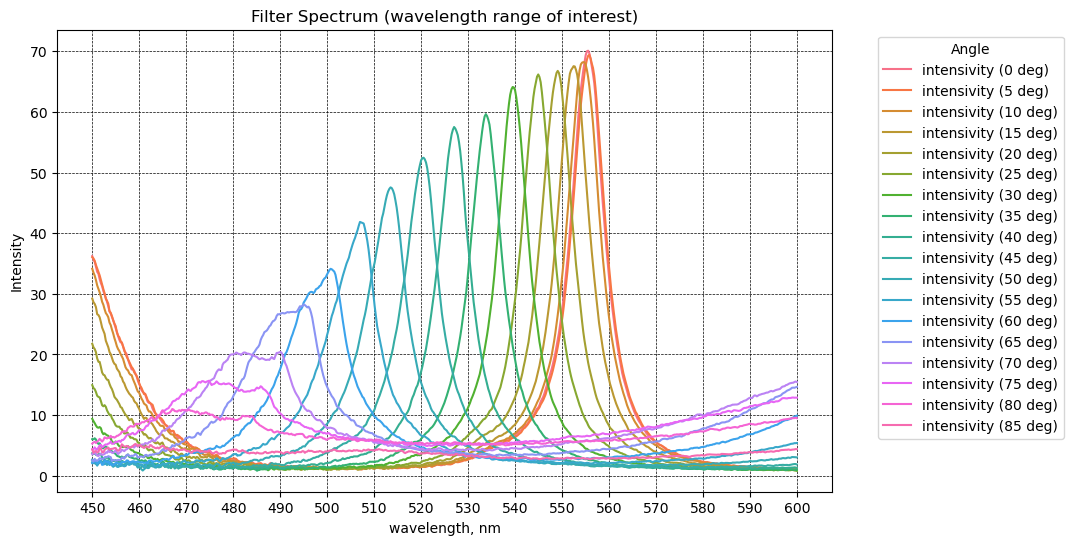

In [52]:
# Фильтрация по диапазону 450–600 нм
df_filtered = df_long[(df_long["lambda, nm"] >= 450) & (df_long["lambda, nm"] <= 600)]
plt.figure(figsize=(10,6))
sns.lineplot(data=df_filtered,
             x="lambda, nm",
             y="Intensity",
             hue="Angle",
             legend=True
)
plt.legend(title='Angle',
           bbox_to_anchor=(1.05, 1),
           loc='upper left'
) # выносим легенду справа от графика
plt.title("Filter Spectrum (wavelength range of interest)")
plt.grid(True, which='both',
         linestyle='--',
         linewidth=0.5,
         color='black'
)  # пунктирная сетка
plt.gca().xaxis.set_major_locator(MultipleLocator(10)) # шаг по оси X
plt.gca().yaxis.set_major_locator(MultipleLocator(10)) # шаг по оси Y
plt.xlabel("wavelength, nm")
plt.ylabel("Intensity")
plt.show()

## Заключение
1. Был проведён EDA над моим датасетом при помощи Jupyter Notebook.
2. Ноутбук был сохранён в `notebooks` под именем `EDA.ipynb`.
3. Были проведены оценки структуры, целостности и полноты данных, выбросов и аномалий, проанализированы полученные результаты.
4. Были построены графики и гистограммы для наглядности представленных данных с помощью библиотеки Seaborn.